# **Individual Assignment 1 | Titanic Dataset**

### Importing Libraries

In [ ]:
# Importing libraries

# Data manipulation and analysis
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import IFrame

# Preprocessing and feature engineering
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.feature_extraction import FeatureHasher
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

# Handling imbalanced data
from imblearn.over_sampling import SMOTE

# Machine learning models
from sklearn.linear_model import LogisticRegression

# Model evaluation
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

# Miscellaneous
import warnings

## 🚢 **Task 1: Titanic Dataset - Initial Exploration**

This section explores the **Titanic dataset**, identifying missing values, feature distributions, and basic statistical insights.

The Titanic dataset contains information about passengers aboard the Titanic, including survival status, class, age, fare, and other details. The goal of this initial exploration is to:

- Load the dataset.
- Understand its structure and content.
- Identify missing values and potential issues.
- Visualize key aspects of the data.
- Answer key data analysis and exploration questions.

### Step 1: Upload dataset

In [2]:
# Load dataset
data = pd.read_excel("titanic3.xls")

# print the shape of the dataset
print("Shape of the dataset:", data.shape)

# Display the first few rows of the dataset
data.head()

Shape of the dataset: (1309, 14)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


1️⃣ Data Dictionary
| Column    | Description |
|-----------|------------|
| survived  | Survival (0 = No, 1 = Yes) |
| pclass    | Passenger Class (1st, 2nd, 3rd) |
| name      | Passenger Name |
| sex       | Sex (Male/Female) |
| age       | Age of Passenger |
| sibsp     | Number of Siblings/Spouses Aboard |
| parch     | Number of Parents/Children Aboard |
| ticket    | Ticket Number |
| fare      | Passenger Fare |
| cabin     | Cabin Number (if known) |
| embarked  | Port of Embarkation (C, Q, S) |
| boat      | Lifeboat Number (if survived) |
| body      | Body Number (if recovered) |
| home.dest | Final Destination |


The dataset contains **1309 entries** and **14 columns**, covering various passenger attributes. Let's inspect the dataset structure and statistics.


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


The dataset includes both **numerical** (`age`, `fare`, `pclas`, `survived`, `sibsp`, `parch`, `body`) and **categorical** (`sex`, `embarked`, `name`, `ticket`, `cabin`, `boat`) variables. Missing values are present, particularly in `cabin`, `boat`, `age`, `fare`, `home.dest` and `body`.


In [4]:
# Display summary statistics
data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


### Step 2: Summary Statistics of Numerical Variables  

**Passenger Class (`pclass`)**  
- The majority of passengers belonged to **3rd class** (median = 3).  

**Survival Rate (`survived`)**  
- Only **38.2%** of passengers survived (mean = 0.38).  

**Age (`age`)**  
- Ranges from **0.17 to 80 years** (median = 28).  
- **Interquartile range (IQR):** 21 to 39 years.  
- **Standard deviation:** 14.41 (significant variability).  

**Family Relationships (`sibsp` and `parch`)**  
- Most passengers **traveled alone** (median **sibsp = 0**, **parch = 0**).  
- Some large families present (**max sibsp = 8, max parch = 9**).  

**Fare (`fare`)**  
- **Highly skewed** distribution from **$0 to $512.33**.  
- **Median fare:** $14.45 (lower than mean = $33.30).  
- **75% of passengers paid less than $31.28**, indicating many low-cost fares.  

**Body Identification (`body`)**  
- Only **121 out of 1309** records contain a body identification number.  

**Key Insights:**  
- Most passengers were young, in 3rd class, and traveled alone.  
- Fare distribution is skewed, requiring potential log transformation.  
- Age variability suggests it may be an important survival predictor.
- Handling missing values and scaling are necessary preprocessing steps.  


In [5]:
# Function to summarize unique values
def get_unique_value_summary(column):
    unique_values = data[column].value_counts()
    
    if len(unique_values) <= 5:
        return ", ".join([f"{idx}: {val}" for idx, val in unique_values.items()])  # Show all values
    else:
        # Show only repeated values and their counts
        repeated_values = unique_values[unique_values > 1]
        if not repeated_values.empty:
            return ", ".join([f"{idx}: {val}" for idx, val in repeated_values.items()])
        else:
            return "All unique"

# Compute unique value statistics
unique_values_summary = pd.DataFrame({
    "Column": data.columns,
    "Unique Values": [data[col].nunique() for col in data.columns],
    "Data Type": [data[col].dtype for col in data.columns],
    "Value Summary": [get_unique_value_summary(col) for col in data.columns]
})

# Sort by number of unique values for better readability
unique_values_summary = unique_values_summary.sort_values(by="Unique Values", ascending=False)

# Display unique value statistics
unique_values_summary



,Column,Unique Values,Data Type,Value Summary
2,name,1307,object,"Connolly, Miss. Kate: 2, Kelly, Mr. James: 2"
7,ticket,939,object,"CA. 2343: 11, CA 2144: 8, 1601: 8, S.O.C. 1487..."
13,home.dest,369,object,"New York, NY: 64, London: 14, Montreal, PQ: 10..."
8,fare,281,float64,"8.05: 60, 13.0: 59, 7.75: 55, 26.0: 50, 7.8958..."
9,cabin,186,object,"C23 C25 C27: 6, G6: 5, B57 B59 B63 B66: 5, F4:..."
12,body,121,float64,All unique
4,age,98,float64,"24.0: 47, 22.0: 43, 21.0: 41, 30.0: 40, 18.0: ..."
11,boat,28,object,"13: 39, C: 38, 15: 37, 14: 33, 4: 31, 10: 29, ..."
6,parch,8,int64,"0: 1002, 1: 170, 2: 113, 3: 8, 4: 6, 5: 6, 6: ..."
5,sibsp,7,int64,"0: 891, 1: 319, 2: 42, 4: 22, 3: 20, 8: 9, 5: 6"


**External Fact of the column Cabin**

Research indicates that the cabin assignments on the RMS Titanic were closely linked to passengers' socioeconomic status and ticket class:

- **First-Class Passengers:** Occupied the upper decks (A, B, C), which featured the most luxurious accommodations. These cabins were priced higher and were primarily reserved for wealthy individuals.

- **Second-Class Passengers:** Stayed on the middle decks (D, E), offering comfortable yet less opulent facilities compared to first class.

- **Third-Class Passengers:** Located on the lower decks (F, G), these accommodations were more modest and affordable, catering to passengers of lower socioeconomic status.

This arrangement reflects the broader societal structures of the early 20th century, where socioeconomic status significantly influenced access to amenities and safety. Notably, survival rates during the Titanic disaster varied with cabin class, underscoring the impact of social class on passengers' experiences.

**Sources:**
- Frey, B. S., Savage, D. A., & Torgler, B. (2010). "Interaction of natural survival instincts and internalized social norms exploring the Titanic and Lusitania disasters." *Proceedings of the National Academy of Sciences*, 107(11), 4862-4865.

- Frey, B. S., Savage, D. A., & Torgler, B. (2009). "Surviving the Titanic Disaster: Economic, Natural and Social Determinants." *CESifo Working Paper Series No. 2551*.

### Step 3: Unique Values Analysis

The dataset contains **a mix of categorical and numerical variables**, with varying levels of uniqueness. This are the key insights:

- **Highly Unique Columns**  
  - *Name* (1,307 unique values): Almost all values are unique except for **"Connolly, Miss. Kate" and "Kelly, Mr. James"** appearing twice.  
  - *Ticket* (939 unique values): Some tickets are shared, for example **"CA. 2343" appearing 11 times**.  
  - *Home Destination* (369 unique values): The most common destination is **New York, NY (64 occurrences)**.

- **Numerical Features with Repeated Values**  
  - *Fare* (281 unique values): Some common fares include **$8.05 (60 times)** and **$13.00 (59 times)**.  
  - *Age* (98 unique values): The most frequent ages are **24 (47 passengers)** and **22 (43 passengers)**.  

- **Categorical Features with Limited Unique Values**  
  - *Pclass* (3 unique values): Majority are **3rd class (709 passengers)**.  
  - *Sex* (2 unique values): **Male (843 passengers)** outnumbers **female (466 passengers)**.  
  - *Survival* (2 unique values): **Non-survivors (809)** outnumber **survivors (500)**.  

- **Special Cases**  
  - *Cabin* (186 unique values): Some decks are shared, with **"C23 C25 C27" appearing 6 times**.  
  - *Boat* (28 unique values): Different lifeboats have different capacities, with **Boat 13 carrying 39 passengers**.  
  - *Body* (121 unique values): **All unique**, indicating this data likely represents identified bodies.

**🔍 Key Takeaways**
- Some **categorical columns with many unique values** (*name, ticket, cabin, home.dest*) might require **grouping or encoding adjustments**.  
- **Pclass, Sex, and Embarked** have **low cardinality**, making them suitable for **One-Hot Encoding**.  
- **Age and Fare** show common values, which might indicate underlying patterns useful for modeling.

These insights help in deciding **feature selection and encoding strategies** for better model performance.



### Step 4: Plotting

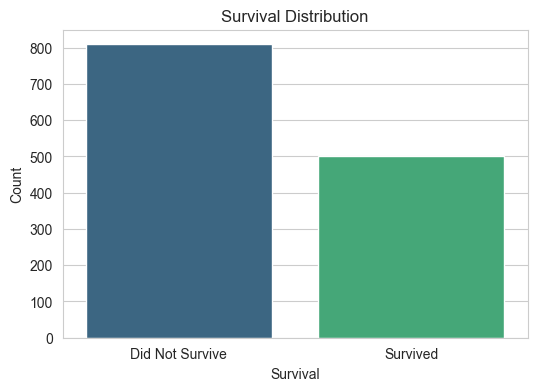

In [6]:
# Set visualization style
sns.set_style("whitegrid")
# Survival count plot
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x="survived", hue="survived", palette="viridis", legend=False)
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.xlabel("Survival")
plt.ylabel("Count")
plt.title("Survival Distribution")
plt.show()

🔍 **Observation:**  
- More people **did not survive (61.8%)** than survived (38.2%).
- This class imbalance should be considered when training a predictive model.

---


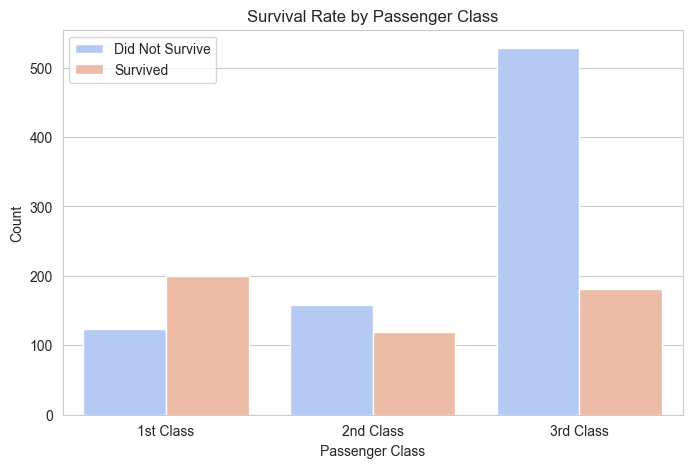

In [7]:
plt.figure(figsize=(8, 5))
sns.countplot(x=data["pclass"], hue=data["survived"], palette="coolwarm")
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'])
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.title("Survival Rate by Passenger Class")
plt.legend(["Did Not Survive", "Survived"])
plt.show()

🔍 **Observation:**  
- **1st Class passengers** had the highest survival rate.
- **3rd Class passengers** had the lowest survival rate, indicating socioeconomic factors played a role.

---


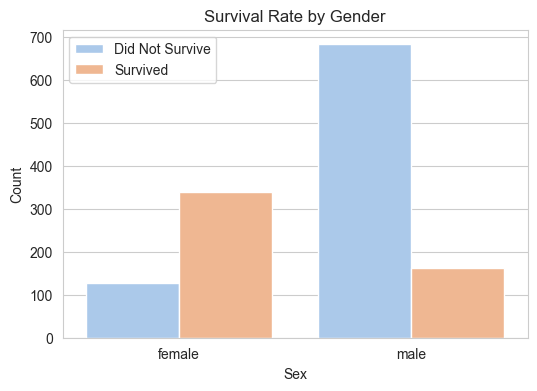

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(x=data["sex"], hue=data["survived"], palette="pastel")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Survival Rate by Gender")
plt.legend(["Did Not Survive", "Survived"])
plt.show()

🔍 **Observation:**  
- **Females had a significantly higher survival rate** than males.
- This aligns with the **"women and children first"** principle used during evacuation.

---


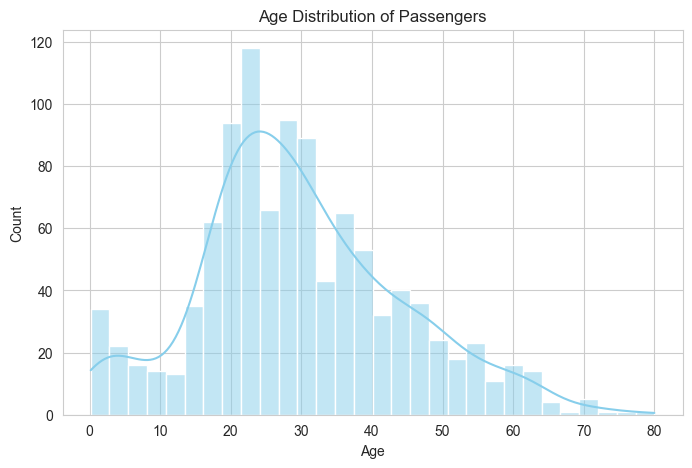

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(data["age"].dropna(), bins=30, kde=True, color="skyblue")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution of Passengers")
plt.show()


🔍 **Observation:**  
- Most passengers were between **20-40 years old**.
- A few **elderly passengers (above 60)** were aboard.

---


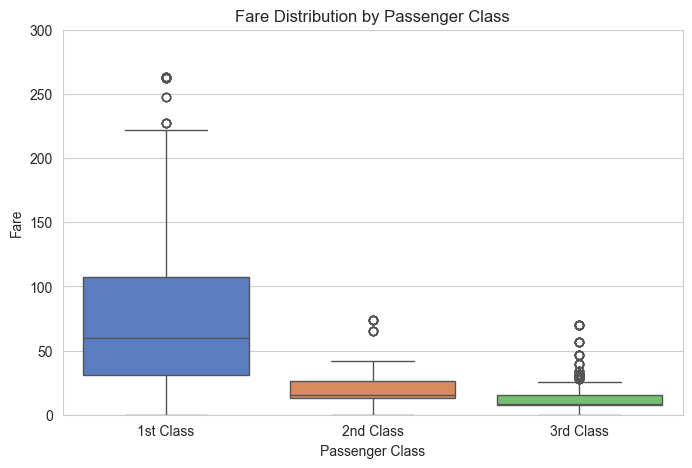

In [10]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x="pclass", y="fare", hue="pclass", palette="muted", legend=False)
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'])
plt.xlabel("Passenger Class")
plt.ylabel("Fare")
plt.title("Fare Distribution by Passenger Class")
plt.ylim(0, 300)  # Limiting y-axis to remove extreme outliers
plt.show()

🔍 **Observation:**  
- **1st Class passengers paid the highest fares**, sometimes exceeding **$250**.
- **3rd Class passengers paid significantly lower fares**.

---


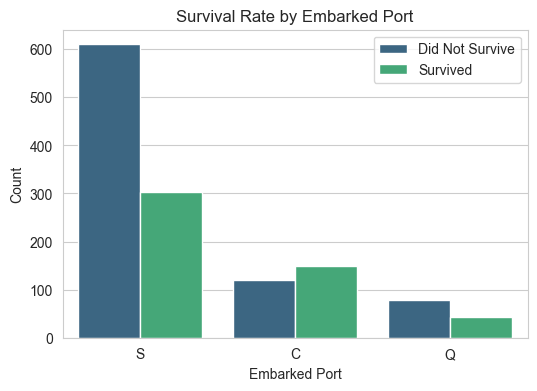

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(x=data["embarked"], hue=data["survived"], palette="viridis")
plt.xlabel("Embarked Port")
plt.ylabel("Count")
plt.title("Survival Rate by Embarked Port")
plt.legend(["Did Not Survive", "Survived"])
plt.show()

🔍 **Observation:**  
- Passengers embarking from **Cherbourg (C) had a higher survival rate**.
- Most passengers embarked at **Southampton (S)**.

---


### Step 5: Answering key questions from the slides


#### 1️⃣ Are the data tidy?
The dataset is **mostly tidy**, but some columns require **cleaning**:
- **Cabin**: Multiple cabin values in a single cell.
- **Boat**: Some passengers listed with multiple lifeboats.
- **Ticket**: Needs feature extraction, or removing it as it probably doesn't help the model prediction in any way.

✅ **Verdict**: **Mostly tidy**, but requires **feature engineering**.

---

#### 2️⃣ Are the data tidy but incomplete?
Several columns have missing values:
| Column      | Missing Values | % Missing |
|------------|----------------|-----------|
| age        | 263            | 20.1%     |
| fare       | 1              | <0.1%     |
| embarked   | 2              | 0.15%     |
| cabin      | 1014           | 77.5%     |
| boat       | 823            | 62.8%     |
| body       | 1188           | 90.8%     |
| home.dest  | 564            | 43.1%     |

✅ **Verdict**: **Yes, data are incomplete.** Imputation is required.

---

#### 3️⃣ Are the data tidy but with duplicates?
Potential duplicates exist:
- `name`: 1307 unique values for 1309 rows.
- `ticket`: Some tickets shared among passengers.
- `cabin`: Potential inconsistencies.

✅ **Verdict**: **Possible duplicates** in `Name` and `Ticket`.

---

#### 4️⃣ Are the data expired or outdated?
The dataset **represents a historical event (1912)**, so **expiration is not a concern**.

✅ **Verdict**: **No risk of outdated data**.

---

#### 5️⃣ Are the data incomplete or unrepresentative?
- **Survival rates are imbalanced** (38.2% survived, 61.8% did not).
- **Missing data may introduce bias**.

✅ **Verdict**: **Dataset is incomplete and may not fully represent survival patterns**.

---

#### 6️⃣ Is the data source known?
The **Titanic dataset is well-documented** and sourced from **passenger records**.

✅ **Verdict**: **Yes, the source is known** and was provided by the professor and can be founded onlune for public access.

---

#### 7️⃣ Were gender data manually inputted or derived?
- The **`sex` column is probably manually recorded**.
- No automated classifier used.

✅ **Verdict**: **Gender data is reliable**.

---

#### 8️⃣ Is there data leakage?
- **Boat column** indirectly reveals survival status.
- **Body column** only recorded for deceased passengers.
✅ **Verdict**: **Yes, potential leakage. Drop `Boat` and `Body`**.

---

#### 9️⃣ Are the data reliable?
- **Survival labels** are historically accurate.
- **Potential inconsistencies** in `home.dest` and `cabin`.

✅ **Verdict**: **Mostly reliable, but some validation needed**.

---

#### **📌 Final Summary**
| **Issue**                | **Status**                | **Recommended Action**                                   |
|--------------------------|--------------------------|----------------------------------------------------------|
| **Tidy Data**            | Mostly tidy              | Feature engineering for `Cabin`, `Boat`, `Ticket`, `Name` |
| **Missing Data**         | Yes                      | Impute `Age`, `Fare`, `Embarked`                        |
| **Duplicates**           | Possibly                 | Check `Name`, `Ticket` for duplicates                   |
| **Outdated Data**        | No                       | Not an issue                                            |
| **Unrepresentative Data**| Yes                      | Missing data may introduce bias                         |
| **Data Leakage?**        | Yes                      | Drop `Boat` and `Body`                                  |
| **Data Reliability?**    | Generally reliable       | Validate labels                                         |


## 📌 **Task 2: Managing Missing Values**

The Titanic dataset contains missing values that must be handled to ensure **data integrity** and **model accuracy**. The goal of this section is to:
- Identify and analyze missing values.  
- Apply appropriate **imputation** or remove columns if necessary.  
- Verify that no missing values remain.  

Proper handling prevents **bias** and ensures the dataset is **ready for feature engineering and modeling**. 🚀  


### Step 1: Identifying Missing Values


Before handling missing values, we first identify **which columns contain missing data** and their percentage. Understanding missing values is crucial to selecting the best imputation strategy.



In [12]:
# Compute missing values and percentage
missing_df = data.isnull().sum().to_frame(name="Missing Values")
missing_df["Percentage"] = (missing_df["Missing Values"] / len(data)) * 100

# Filter only columns with missing values
missing_df = missing_df[missing_df["Missing Values"] > 0].sort_values(by="Percentage", ascending=False)

# Display summary
print("🔍 Missing Values Summary:\n")
print(missing_df)

# Identify columns to drop (above 75% missing values)
drop_columns = missing_df[missing_df["Percentage"] >= 75].index.tolist()
print("\n🚨 Columns Recommended for Dropping (≥75% Missing):", drop_columns)

🔍 Missing Values Summary:

           Missing Values  Percentage
body                 1188   90.756303
cabin                1014   77.463713
boat                  823   62.872422
home.dest             564   43.086325
age                   263   20.091673
embarked                2    0.152788
fare                    1    0.076394

🚨 Columns Recommended for Dropping (≥75% Missing): ['body', 'cabin']


- **Columns with more than 75% missing values** typically provide **limited useful information** and can introduce noise.  
  - In this dataset, `Body` and `Cabin` exceed this threshold and should be **removed** due to their high percentage of missing values.  

- **Data Leakage Consideration:**  
  - The `boat` column **implicitly indicates survival**, as it records the lifeboat a passenger boarded.  
  - Keeping this feature would allow the model to "cheat" by learning direct survival outcomes rather than true predictive patterns.  
  - To ensure the integrity of the model, **we should drop `boat`** to prevent **data leakage**.  

C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


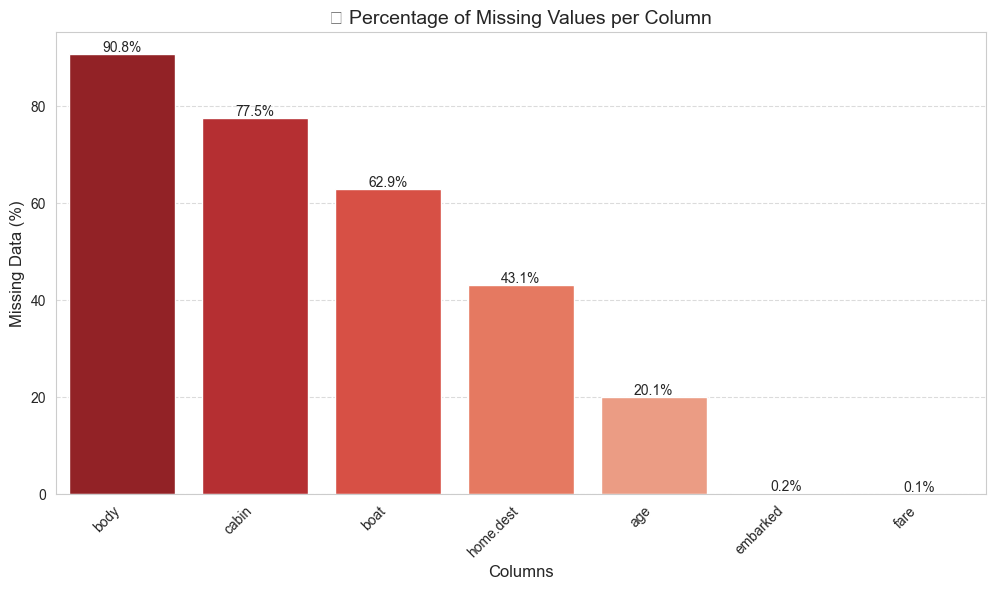

In [13]:
# Ensure missing_df is not empty before plotting
if not missing_df.empty:
    plt.figure(figsize=(12, 6))

    # Use `hue=missing_df.index` and set legend=False to avoid warning
    sns.barplot(
        x=missing_df.index, 
        y=missing_df["Percentage"], 
        hue=missing_df.index,  # Assign hue to the x-variable to avoid FutureWarning
        palette="Reds_r",
        dodge=False,  # Prevents seaborn from shifting bars
        legend=False  # Removes unnecessary legend
    )

    # Customizing the plot
    plt.title("📉 Percentage of Missing Values per Column", fontsize=14)
    plt.ylabel("Missing Data (%)", fontsize=12)
    plt.xlabel("Columns", fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    # Show values on bars
    for index, value in enumerate(missing_df["Percentage"]):
        plt.text(index, value + 0.5, f"{value:.1f}%", ha="center", fontsize=10)

    plt.show()
else:
    print("✅ No missing values found in the dataset.")


### Step 2: Strategy for Handling Missing Values


Now that we have identified missing values, we must decide the best approach to handle them. The strategy depends on:
1. The **importance of the column** for survival prediction.
2. The **percentage of missing data**—if too high, the column may be dropped.
3. Whether missing values are **random or systematic**, which can impact predictive modeling.

Below is the **selected strategy for each column**:

Taking into account the existing features, I do not believe home.dest adds meaningful predictive value to the model. To support this decision, we first analyze its high cardinality (too many unique values), which can reduce its usefulness in a machine learning model.

In [14]:
# Check number of unique values
unique_home_dest = data["home.dest"].nunique()
total_samples = len(data)

print(f"Unique values in 'home.dest': {unique_home_dest}")
print(f"Proportion of unique values: {unique_home_dest / total_samples:.2%}")


Unique values in 'home.dest': 369
Proportion of unique values: 28.19%


As observed, there are **369** different **home destinations** among passengers, indicating high cardinality. Including such a feature can significantly increase model complexity without adding substantial predictive power.

According to the principle of parsimony, simpler models with fewer, more meaningful features tend to generalize better. Furthermore, survival on the Titanic was primarily influenced by factors such as class, age, gender, and access to lifeboats. Since a passenger’s home destination was only determined after survival, it is logically irrelevant for predicting survival outcomes. Therefore, we **justify dropping** this feature from our model.

In [15]:
# Check number of unique values
unique_ticket = data["ticket"].nunique()
total_samples = len(data)

print(f"Unique values in ticket: {unique_ticket}")
print(f"Proportion of unique values: {unique_ticket / total_samples:.2%}")


Unique values in ticket: 939
Proportion of unique values: 71.73%


We see ticket is unique for almost each passenger, so we can drop it. also. We can also assume it is random and does not have any impact on the survival. 


| Column         | Imputation Strategy         | Justification |
|--------------|----------------------------|---------------|
| **Boat, Body, Home.dest, Ticket** | **Drop the column** | `Boat` and `Body` introduce **data leakage**. `Home.dest` has **high cardinality** and lacks predictive relevance. `Ticket` is mostly unique, providing little value. |
| **Age**      | **Mean Imputation**         | Age follows a **roughly normal distribution**, making the mean a reasonable choice to maintain distribution integrity. |
| **Fare**     | **Median Imputation**       | `Fare` contains **outliers**, so the median prevents skewing by extreme values. |
| **Embarked** | **Mode Imputation**         | `Embarked` is **categorical**, so replacing missing values with the most frequent category preserves distribution. |
| **Cabin**    | **New Category ("Unknown")** | `Cabin` correlates with class and survival; rather than dropping it, we retain it with an `"Unknown"` category to preserve potential information. |

### Step 3: Dropping Columns

Columns with excessive missing values, or to avoid data leakage or with lack of predictive relevance are removed.


In [16]:
# Drop Boat, Body, and Home.dest columns due to high missing values and potential leakage
data.drop(columns=['boat', 'body', 'home.dest', 'ticket'], inplace=True)

✅ **Dropped columns**:
- `Boat` (directly indicates survival).
- `Body` (only recorded for deceased passengers).
- `Home.dest` (not relevant to survival).
- `Ticket` (not relevant to survival, high cardniality).

### Step 4: Handling Cabin - Before Splitting


We replace missing values in the `cabin` column with `"Unknown"` **before splitting** the dataset. This approach is acceptable because:
- **Deterministic Transformation:** Replacing missing values with a fixed value ("Unknown") is a simple, deterministic operation that does not rely on statistical estimates from the data.
- **Consistency:** It ensures that the same pre-processing is applied to all subsets (training, validation, and test), as the transformation is performed on the entire dataset.
- **No Data Leakage:** Since we are not using any information (e.g., the overall distribution) to impute the missing values, there is no risk of data leakage.
- **Categorical Feature Handling:** Treating "Unknown" as a separate category allows us to capture potential signals related to cabin assignment without losing information.

The cabin assignments on the RMS Titanic were closely linked to passengers' socioeconomic status and ticket class:

- **First-Class Passengers:** Occupied the upper decks (A, B, C), which featured the most luxurious accommodations. These cabins were priced higher and were primarily reserved for wealthy individuals.

- **Second-Class Passengers:** Stayed on the middle decks (D, E), offering comfortable yet less opulent facilities compared to first class.

- **Third-Class Passengers:** Located on the lower decks (F, G), these accommodations were more modest and affordable, catering to passengers of lower socioeconomic status.

This arrangement reflects the broader societal structures of the early 20th century, where socioeconomic status significantly influenced access to amenities and safety. Notably, survival rates during the Titanic disaster varied with cabin class, underscoring the impact of social class on passengers' experiences. You can observe cabin actuall distribution below in the deckplans of RMS Titanic.

In [ ]:
# URL of the page you want to embed
url = "http://www.titanicsite.freewebspace.com/photo.html"

# Display the iframe in the notebook
IFrame(src=url, width='100%', height=600)


#### Step 4.1: Checking Cabin Values

Before any transformations, we first explore the `cabin` column to understand its current state, including missing values and rare entries.

In [17]:
print("Unique values in 'cabin' before any cleaning:")
print(data["cabin"].unique()[:20])  
missing_cabin = data["cabin"].isnull().sum()
print(f"\n❓ Missing 'cabin' entries: {missing_cabin}")


Unique values in 'cabin' before any cleaning:
['B5' 'C22 C26' 'E12' 'D7' 'A36' 'C101' nan 'C62 C64' 'B35' 'A23'
 'B58 B60' 'D15' 'C6' 'D35' 'C148' 'C97' 'B49' 'C99' 'C52' 'T']

❓ Missing 'cabin' entries: 1014


#### Step 4.2: Replacing Missing Values and Rare Entries

We replace all missing cabin entries with `"Unknown"` and handle any rare or suspicious cabin letters (e.g., `'T'`) by treating them as `"Unknown"`.

In [18]:
# Step 4.2: Replace missing cabins with "Unknown" and cast to string
data["cabin"] = data["cabin"].fillna("Unknown").astype(str)

# Handle 'T' as 'Unknown' if it exists
data["cabin"] = data["cabin"].replace("T", "Unknown")

# Extract the first letter (deck level), e.g., "C85" → "C"
data["cabin"] = data["cabin"].str[0]

print(data["cabin"].unique())

['B' 'C' 'E' 'D' 'A' 'U' 'F' 'G']


#### Step 4.3:  Ordinal Encoding with Verification

- **Use `LabelEncoder`** to transform the resulting letters into numeric code, according to scikit learn page "This transformer should be used to encode target values, i.e. y, and not the input X.". - Scikit-learn’s [LabelEncoder documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) so in cocnlusion we shouldn't use it. But we can still use another encoder that works the same.
- **Verify** that each letter has the **intended numeric assignment** by comparing the `classes_` attribute of the encoder side by side with the actual letters.


In [19]:
# Initialize and fit the OrdinalEncoder on the 'cabin' column
ordinal_encoder = OrdinalEncoder()
# Note: OrdinalEncoder expects a 2D array, so we pass the column as a DataFrame
data["cabin_encoded"] = ordinal_encoder.fit_transform(data[["cabin"]]).astype(int)

# Verify the mapping by retrieving the sorted unique categories
print("Ordinal Encoding Mapping (Alphabetical):")
mapping = {cat: idx for idx, cat in enumerate(ordinal_encoder.categories_[0])}
for cat, idx in mapping.items():
    print(f"'{cat}' -> {idx}")

# Display the first few rows to confirm the encoding
print("\nPreview of cabin and cabin_encoded:")
display(data[["cabin", "cabin_encoded"]].head(10))

# Drop the original 'cabin' column
data.drop(columns=["cabin"], inplace=True)


Ordinal Encoding Mapping (Alphabetical):
'A' -> 0
'B' -> 1
'C' -> 2
'D' -> 3
'E' -> 4
'F' -> 5
'G' -> 6
'U' -> 7

Preview of cabin and cabin_encoded:


,cabin,cabin_encoded
0,B,1
1,C,2
2,C,2
3,C,2
4,C,2
5,E,4
6,D,3
7,A,0
8,C,2
9,U,7


#### Step 4.4: Explanation and Justification

- **Missing Values → "Unknown":**  
  We first assign `"Unknown"` to all missing cabin entries, ensuring no data leakage because this is a **deterministic** replacement.

- **Extract First Letter:**  
  Many cabins are written like `"C85"` or `"B57 B59"`. Taking only the first letter (`"C"`, `"B"`) helps group decks logically.

- **Replacing `'T'` with `'Unknown'`:**  
  If `'T'` is extremely rare or erroneous, this step keeps data consistent.

- **Ordinal Encoding**:
  1. **Fits** on the **entire** `cabin` column.  
  2. **Assigns** each unique letter a numeric code in **alphabetical** order.  
  3. The code snippet prints `le_cabin.classes_`, so we can **verify** each letter is mapped as expected.

- **Side-by-Side Verification**:
  - We **print** how `'A'`, `'B'`, `'C'`, etc. are mapped to **0, 1, 2**, etc.  
  - By comparing `data[["cabin", "cabin_encoded"]]`, we ensure the correct numeric assignment is applied.

Thus, we maintain a **consistent numeric representation** of cabin decks (plus `"Unknown"`) while **verifying** the encoder’s mapping.


### Step 5: Splitting Dataset

**Why Splitting Before Imputation?**  

In the assignment, **Task 5 (Data Splitting)** was originally placed after handling missing values. However, I decided to **perform the split before imputation** to prevent **data leakage**.  

🔹 **Avoiding Data Leakage:**  
- If we impute missing values **before splitting**, we use information from the entire dataset to fill in gaps.  
- This unintentionally allows the validation and test sets to influence the training set, leading to **inflated model performance** that wouldn't generalize to new data.  

🔹 **Correct Approach:**  
- First, **split** the dataset into training, validation, and test sets.  
- Then, **impute missing values only within the training set**, ensuring that no information from validation or test sets is leaked into training.  

By following this approach, the model remains **fairly evaluated on unseen data**, reflecting **real-world performance** more accurately.


In [20]:
# 🎯 Define the target variable
target = "survived"

# 🛠 Define features (X) and target (y)
X = data.drop(columns=[target])  # Keep only features, drop the target
y = data[target].astype(int)  # Convert target variable to integer

# 🚀 Step 1: Perform Splitting Before Data Imputation
# First split: Training (70%) and Remaining (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Second split: Validation (50%) and Test (50%) from remaining 30%
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

# ✅ Display dataset sizes after splitting
print(f"Training Set: X={X_train.shape}, y={y_train.shape}")
print(f"Validation Set: X={X_val.shape}, y={y_val.shape}")
print(f"Test Set: X={X_test.shape}, y={y_test.shape}")



Training Set: X=(916, 9), y=(916,)
Validation Set: X=(196, 9), y=(196,)
Test Set: X=(197, 9), y=(197,)


| Dataset      | Percentage | Purpose |
|-------------|-----------|---------|
| **Training**   | 70%  | Model training |
| **Validation** | 15%  | Hyperparameter tuning |
| **Test**       | 15%  | Final evaluation |

### Step 6: Hangling Imputations

#### Step 6.1: Handling Embarked - Mode Imputation


Since **only two values** are missing, we replace them with the most common value.

In [21]:
# 🚀 Compute mode of 'embarked' **only on training data**
most_common_embarked = X_train["embarked"].mode().iloc[0]  

# 🏗 Apply mode imputation using the training mode
X_train["embarked"] = X_train["embarked"].fillna(most_common_embarked)
X_val["embarked"] = X_val["embarked"].fillna(most_common_embarked)
X_test["embarked"] = X_test["embarked"].fillna(most_common_embarked)

print(f"✅ Missing values in 'embarked' filled with mode: {most_common_embarked}")


✅ Missing values in 'embarked' filled with mode: S


####  Step 6.2: Handling Age - Mean Imputation

We aim to **impute missing Age values** using a **grouped mean approach**, proving that **Pclass is the best grouping feature** to maintain the dataset’s demographic structure, even though sex could also be a posibility.


Compute Correlation Between Age and Categorical Variables

In [22]:
# Convert 'sex' column to numerical values for correlation computation
X_train["sex_numeric"] = X_train["sex"].map({"male": 1, "female": 0})

# Compute correlation between age and categorical variables (pclass and sex_numeric)
correlation_pclass = X_train["age"].corr(X_train["pclass"])
correlation_sex = X_train["age"].corr(X_train["sex_numeric"])

# Create a DataFrame to store correlation values
correlation_df = pd.DataFrame({
    "Feature": ["pclass", "sex"],
    "Correlation with Age": [correlation_pclass, correlation_sex]
}).sort_values(by="Correlation with Age", ascending=False)

# Display correlation values
print("📊 Correlation between Age and Categorical Features:")
print(correlation_df)

# Select the feature with the highest correlation
best_grouping_feature = correlation_df.iloc[correlation_df["Correlation with Age"].idxmax(), 0]
best_correlation_value = correlation_df["Correlation with Age"].abs().max()

📊 Correlation between Age and Categorical Features:
  Feature  Correlation with Age
1     sex              0.088947
0  pclass             -0.398730


Visualizing the Relationship Between Age and Best Feature

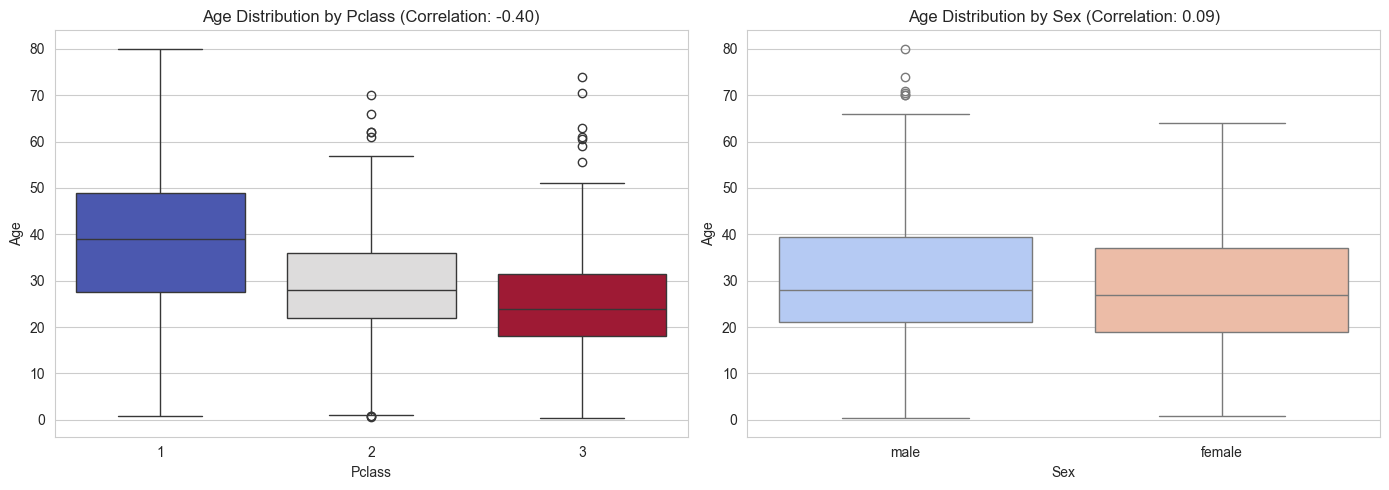

✅ The best feature for grouping Age imputation is: pclass (Correlation: 0.40)


In [23]:
# Plot Age Distribution by Pclass and Sex
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.boxplot(data=X_train, x="pclass", y="age", hue="pclass", dodge=False, palette="coolwarm", legend=False, ax=axes[0])
axes[0].set_title(f"Age Distribution by Pclass (Correlation: {correlation_pclass:.2f})")
axes[0].set_xlabel("Pclass")
axes[0].set_ylabel("Age")

sns.boxplot(data=X_train, x="sex", y="age", hue="sex", dodge=False, palette="coolwarm", legend=False, ax=axes[1])
axes[1].set_title(f"Age Distribution by Sex (Correlation: {correlation_sex:.2f})")
axes[1].set_xlabel("Sex")
axes[1].set_ylabel("Age")

plt.tight_layout()
plt.show()

# Print the final selected feature
print(f"✅ The best feature for grouping Age imputation is: {best_grouping_feature} (Correlation: {best_correlation_value:.2f})")



 Analyzing Age Ranges for Each Pclass Group

📊 Mean Age per Pclass:
pclass
1    38.531609
2    29.743845
3    24.762488
Name: age, dtype: float64


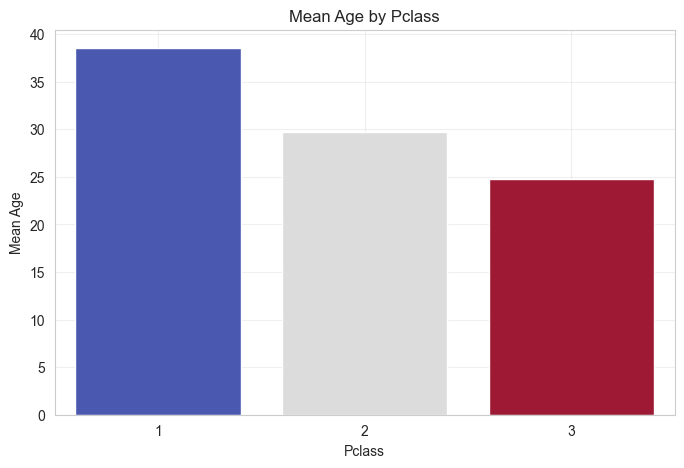

In [24]:
# Compute mean age per Pclass
age_means_by_pclass = X_train.groupby("pclass")["age"].mean()

# Display mean age per Pclass
print("📊 Mean Age per Pclass:")
print(age_means_by_pclass)

# Plot Age Distribution by Pclass (Fixing Future Warning)
plt.figure(figsize=(8, 5))
sns.barplot(data=age_means_by_pclass.reset_index(), x="pclass", y="age", hue="pclass", palette="coolwarm", dodge=False)
plt.xlabel("Pclass")
plt.ylabel("Mean Age")
plt.title("Mean Age by Pclass")
plt.grid(alpha=0.3)
plt.legend([], frameon=False)
plt.show()


Correlation Matrix

C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


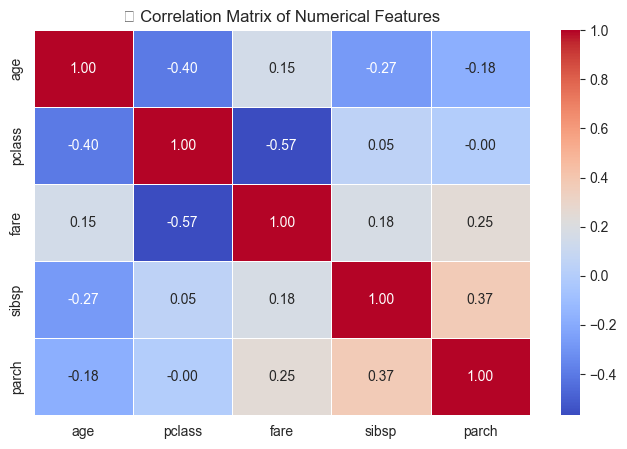

In [25]:
# Compute correlation matrix for numerical features
numerical_features = ["age", "pclass", "fare", "sibsp", "parch"]
corr_matrix = X_train[numerical_features].corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("📊 Correlation Matrix of Numerical Features")
plt.show()


Apply Pclass-Based Mean Imputation

In [26]:
# 🚀 Compute mean age per Pclass in training data
age_means_by_pclass = X_train.groupby("pclass")["age"].mean()

# 🏗 Apply Pclass-based mean imputation for missing Age values
for pclass, mean_age in age_means_by_pclass.items():
    X_train.loc[(X_train["age"].isnull()) & (X_train["pclass"] == pclass), "age"] = mean_age
    X_val.loc[(X_val["age"].isnull()) & (X_val["pclass"] == pclass), "age"] = mean_age
    X_test.loc[(X_test["age"].isnull()) & (X_test["pclass"] == pclass), "age"] = mean_age

print("✅ Age imputation completed using Pclass-specific means.")



✅ Age imputation completed using Pclass-specific means.


In [27]:
# Drop "sex_numeric" column after imputation
X_train.drop(columns=["sex_numeric"], inplace=True)

**Filled missing Age values using Pclass-specific means:**
- **First-Class:** ~38.53 years  
- **Second-Class:** ~29.74 years  
- **Third-Class:** ~24.76 years  

🔍 **Justification:**
- Instead of a **single mean (~29.88 years)**, we used **grouped means** based on **Pclass** to reflect the actual distribution.  
- **First-class passengers tend to be older**, while **third-class passengers are generally younger**.  
- This approach **preserves the real demographic structure** of the dataset and avoids distorting the age distribution.



#### Step 6.3: Handling Fare - Median Imputation


Since only **one fare** is missing, we replace it with the **median** to prevent outliers from skewing the data.

In [28]:
# 🚀 Compute median fare **only on training data**
median_fare = X_train["fare"].median()

# 🏗 Apply median imputation using the training median
X_train["fare"] = X_train["fare"].fillna(median_fare)
X_val["fare"] = X_val["fare"].fillna(median_fare)
X_test["fare"] = X_test["fare"].fillna(median_fare)

print(f"✅ Missing value in 'Fare' filled with median: {median_fare}")

✅ Missing value in 'Fare' filled with median: 14.4542


### Step 7: Verifying Data After Handling Missing Values

To ensure all missing values have been handled correctly, we re-check the dataset.

In [29]:
# 🚀 Function to check missing values in a dataset
def check_missing_values(dataset, name):
    missing_values = dataset.isnull().sum()
    missing_values = missing_values[missing_values > 0]  # Filter only columns with missing values
    
    if missing_values.empty:
        print(f"✅ No missing values remain in {name}.")
    else:
        print(f"⚠️ Columns with remaining missing values in {name}:")
        print(missing_values)

# 🔍 Check missing values in all sets
check_missing_values(X_train, "Training Set (X_train)")
check_missing_values(X_val, "Validation Set (X_val)")
check_missing_values(X_test, "Test Set (X_test)")


✅ No missing values remain in Training Set (X_train).
✅ No missing values remain in Validation Set (X_val).
✅ No missing values remain in Test Set (X_test).


## 📌 **Task 3: Encoding Categorical Variables**

Machine learning models typically require **numerical inputs**, so categorical variables must be transformed into numerical representations.  
In this step, we:  
- **Identify categorical variables** in the dataset.  
- **Apply OneHotEncoder** to convert them into numerical form.  
- **Discuss the impact** of encoding on model performance.  


### Step 1: Feature Engineering: Family Size

- The dataset contains **`sibsp` (siblings/spouses aboard)** and **`parch` (parents/children aboard)**.
- These two features are summed into a **new column**: `family_size`.
- A single passenger can travel **alone**, with a **small family** (2-4 members), or with a **large family** (5+ members).
- We apply **ordinal encoding** to represent these categories numerically.
- **Why?** Family size **may impact survival**, as larger families may have had difficulty staying together.

In [30]:
# Create family_size column for all datasets
for dataset in [X_train, X_val, X_test]:
    dataset["family_size"] = dataset["sibsp"] + dataset["parch"] + 1  # Include the passenger

# Drop the original 'sibsp' and 'parch' columns
for dataset in [X_train, X_val, X_test]:
    dataset.drop(columns=["sibsp", "parch"], inplace=True)

# Verify that the family_size column exists
print("✅ 'family_size' successfully created in all X_sets.")

✅ 'family_size' successfully created in all X_sets.


### Step 2: Identifying Categorical Variables

In [31]:
# 🚀 Function to identify categorical variables
def get_categorical_columns(dataset, name):
    categorical_columns = dataset.select_dtypes(include=["object"]).columns
    return list(categorical_columns)

# 🔍 Identify categorical variables in all sets
categorical_train = get_categorical_columns(X_train, "Training Set (X_train)")
categorical_val = get_categorical_columns(X_val, "Validation Set (X_val)")
categorical_test = get_categorical_columns(X_test, "Test Set (X_test)")

# 🛠 Ensure consistency across sets
common_categorical = list(set(categorical_train) & set(categorical_val) & set(categorical_test))
print(f"✅ Common Categorical Variables Across Sets: {common_categorical}")


✅ Common Categorical Variables Across Sets: ['name', 'embarked', 'sex']


### Step 3: Choosing the Encoding Method

Based on **lecture slides**, furter analysis, google and chatgpt recomendation we decide the following encoding methods, we apply:
| Column   | Encoding Method | Justification |
|----------|----------------|---------------|
| **sex**  | One-Hot Encoding | Binary categorical (0/1), simple transformation. |
| **embarked** | One-Hot Encoding | Small number of unique values (`C`, `Q`, `S`). |
| **cabin**  | Label Encoding | Too many unique values, better handled as categorical numbers. |
| **name/title**  | One-Hot Encoding | Titles provide social status information, impacting survival probability. |


#### Step 3.1: Extracting Titles from the "name" Column and Encoding "Titles"- One Hot Encoding

Passenger names in the Titanic dataset contain valuable information in the form of titles (e.g., "Mr", "Mrs", "Miss"). These titles can provide insights into social status and potentially impact survival predictions. 

**Steps:**
1. **Extract the Title:**  
   - The names follow a format like `"Last Name, Title. First Name"`.  
   - We split the name on `", "` to isolate the portion containing the title, then split again on `"."` to extract the title itself.
2. **Display Title Distribution:**  
   - We print the value counts of the extracted titles to understand their distribution.
3. **Group Rare Titles:**  
   - Titles that appear infrequently (such as `"Lady"`, `"Capt"`, `"Dr"`, etc.) are grouped under the category `"Rare"` to reduce sparsity.
4. **Standardize Similar Titles:**  
   - Titles with minor variations (like `"Mlle"` and `"Ms"`) are standardized to `"Miss"`, and `"Mme"` is standardized to `"Mrs"`.

This process adds a new `Title` column to the dataset, allowing the model to leverage social and demographic information that may influence survival.


In [32]:
# Extract titles from the "name" column in each X_set
for dataset in [X_train, X_val, X_test]:
    dataset["Title"] = dataset["name"].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

# Group rare titles into a single category "Rare"
for dataset in [X_train, X_val, X_test]:
    dataset["Title"] = dataset["Title"].replace(
        ['Lady', 'the Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],
        'Rare'
    )

# Standardize similar titles
for dataset in [X_train, X_val, X_test]:
    dataset["Title"] = dataset["Title"].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

# Drop the "name" column as it is no longer needed
for dataset in [X_train, X_val, X_test]:
    dataset.drop(columns=["name"], inplace=True)

Now that we have it separated in 5 different categories we are able to use One-Hot Encoding:

In [33]:
# Initialize One-Hot Encoder with unknown value handling
title_encoder = OneHotEncoder(sparse_output=False, drop="first", handle_unknown="ignore")

# Fit One-Hot Encoder on X_train titles
title_encoder.fit(X_train[["Title"]])

# Transform titles into one-hot encoded format
encoded_titles_train = title_encoder.transform(X_train[["Title"]])
encoded_titles_val = title_encoder.transform(X_val[["Title"]])
encoded_titles_test = title_encoder.transform(X_test[["Title"]])

# Convert to DataFrame with appropriate column names
encoded_titles_train_df = pd.DataFrame(encoded_titles_train, 
                                       columns=title_encoder.get_feature_names_out(["Title"]),
                                       index=X_train.index)

encoded_titles_val_df = pd.DataFrame(encoded_titles_val, 
                                     columns=title_encoder.get_feature_names_out(["Title"]),
                                     index=X_val.index)

encoded_titles_test_df = pd.DataFrame(encoded_titles_test, 
                                      columns=title_encoder.get_feature_names_out(["Title"]),
                                      index=X_test.index)

# Drop the original "Title" column from each dataset
X_train.drop(columns=["Title"], inplace=True)
X_val.drop(columns=["Title"], inplace=True)
X_test.drop(columns=["Title"], inplace=True)

# Merge the one-hot encoded features back to each dataset
X_train = pd.concat([X_train.reset_index(drop=True), encoded_titles_train_df.reset_index(drop=True)], axis=1)
X_val = pd.concat([X_val.reset_index(drop=True), encoded_titles_val_df.reset_index(drop=True)], axis=1)
X_test = pd.concat([X_test.reset_index(drop=True), encoded_titles_test_df.reset_index(drop=True)], axis=1)

#### Step 3.2: Encoding for "sex" and "embarked" - One Hot Encoding

The following could be done to "pclass" but it doesn't affect in nothing the accuracy so for parsimony, so i'm not including it as it adds unecessary complexity.

In [34]:
''''

# select pclass for ordinal encoding
ordinal_features = ["pclass"]

# Initialize the Ordinal Encoder
ordinal_encoder = OrdinalEncoder(categories="auto", handle_unknown="use_encoded_value", unknown_value=-1)

# Fit the Ordinal Encoder on X_train and transform all sets
X_train[ordinal_features] = ordinal_encoder.fit_transform(X_train[ordinal_features])
X_val[ordinal_features] = ordinal_encoder.transform(X_val[ordinal_features])
X_test[ordinal_features] = ordinal_encoder.transform(X_test[ordinal_features])

'''

'\'\n\n# select pclass for ordinal encoding\nordinal_features = ["pclass"]\n\n# Initialize the Ordinal Encoder\nordinal_encoder = OrdinalEncoder(categories="auto", handle_unknown="use_encoded_value", unknown_value=-1)\n\n# Fit the Ordinal Encoder on X_train and transform all sets\nX_train[ordinal_features] = ordinal_encoder.fit_transform(X_train[ordinal_features])\nX_val[ordinal_features] = ordinal_encoder.transform(X_val[ordinal_features])\nX_test[ordinal_features] = ordinal_encoder.transform(X_test[ordinal_features])\n\n'

Since "sex" and "embarked" have **a small number of categories**, One-Hot Encoding converts them into **binary columns**.


In [35]:
# 🔍 Select columns for One-Hot Encoding
one_hot_columns = ["sex", "embarked"]

# 🚀 Initialize One-Hot Encoder with Unknown Handling
encoder = OneHotEncoder(sparse_output=False, drop="first", handle_unknown="ignore")

# 🎯 Fit on Training Set (X_train) and Transform
X_train_encoded = encoder.fit_transform(X_train[one_hot_columns])
X_val_encoded = encoder.transform(X_val[one_hot_columns])
X_test_encoded = encoder.transform(X_test[one_hot_columns])

# 📌 Convert to DataFrames with Column Names
encoded_train_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(one_hot_columns), index=X_train.index)
encoded_val_df = pd.DataFrame(X_val_encoded, columns=encoder.get_feature_names_out(one_hot_columns), index=X_val.index)
encoded_test_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(one_hot_columns), index=X_test.index)

# 🛠 Drop Original Categorical Columns and Merge Encoded Features
X_train = X_train.drop(columns=one_hot_columns).reset_index(drop=True)
X_val = X_val.drop(columns=one_hot_columns).reset_index(drop=True)
X_test = X_test.drop(columns=one_hot_columns).reset_index(drop=True)

X_train = pd.concat([X_train, encoded_train_df], axis=1)
X_val = pd.concat([X_val, encoded_val_df], axis=1)
X_test = pd.concat([X_test, encoded_test_df], axis=1)

print("✅ One-Hot Encoding successfully applied to all datasets.")
print(X_train.shape, X_val.shape, X_test.shape)  # Display new shapes

✅ One-Hot Encoding successfully applied to all datasets.
(916, 12) (196, 12) (197, 12)


✅ **Applied One-Hot Encoding**
- Converted **"sex"** to `sex_male` (0 = female, 1 = male).
- Converted **"embarked"** into binary columns (`embarked_Q`, `embarked_S`).


### Step 4: Verifying Encoded Data

**Textual Feature Transformation Considerations**

Since our dataset does not contain any textual features (such as free-form text, reviews, or descriptions), there is no need to apply Bag-of-Words (BoW) or TF-IDF. Instead, we use encoding techniques like Label Encoding and One-Hot Encoding to transform categorical variables (e.g., the cabin information) into numerical features.


After encoding, we check that:
1. **Original categorical columns are removed**.
2. **Newly encoded numerical features exist**.


In [36]:
# 📌 Mostrar las primeras filas de cada dataset después de la codificación
print("📊 X_train Preview:")
display(X_train.head())

print("\n📊 X_val Preview:")
display(X_val.head())

print("\n📊 X_test Preview:")
display(X_test.head())

📊 X_train Preview:


,pclass,age,fare,cabin_encoded,family_size,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,sex_male,embarked_Q,embarked_S
0,1,54.000000,77.2875,3,2,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,3,24.762488,14.4542,7,2,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3,13.000000,31.3875,7,7,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,3,28.500000,16.1000,7,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,3,55.500000,8.0500,7,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0



📊 X_val Preview:


,pclass,age,fare,cabin_encoded,family_size,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,sex_male,embarked_Q,embarked_S
0,3,25.000000,7.775,7,2,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,3,19.000000,7.650,5,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,3,29.000000,9.500,7,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,1,38.531609,50.000,0,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,3,25.000000,0.000,7,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0



📊 X_test Preview:


,pclass,age,fare,cabin_encoded,family_size,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,sex_male,embarked_Q,embarked_S
0,2,24.0,65.0000,7,4,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,3,25.0,7.7750,7,2,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,2,45.0,30.0000,7,3,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,3,37.0,7.9250,7,3,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,3,22.0,7.2292,7,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0


**Outcome:**
- **No categorical variables remain.**
- **Dataset is now fully numerical and ready for ML modeling!**  


## 📌 **Task 4: Feature Scaling**

Feature scaling is crucial for ensuring that **all numerical features have a similar range**, preventing any one feature from **dominating the model**.  

- **Standardize numerical variables** using **StandardScaler**.
- **Normalize numerical variables** using **MinMaxScaler**.
- **Compare Standardization and Normalization** and their impact on machine learning models.

### Step 1: Applying Standardization



**What is Standardization?**
- Rescales features **to have a mean of 0** and **standard deviation of 1**.
- Works well with **normally distributed data**.
- Formula:
$$
[ X_{\text{scaled}} = \frac{X - \mu}{\sigma} ]
$$

In [37]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on X_train and transform it
X_train_standardized = pd.DataFrame(
    scaler.fit_transform(X_train),  # Convert back to DataFrame
    columns=X_train.columns,  # Retain original feature names
    index=X_train.index  # Retain original indices
)

# Transform validation and test sets using the same scaler (without refitting)
X_val_standardized = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns, index=X_val.index)
X_test_standardized = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

**Applied Standardization**
- All numerical features now have **mean = 0, standard deviation = 1**.
- Helps in **gradient-based algorithms (e.g., logistic regression, neural networks)**.
- It specifically helps and contributes to logistic regressions.


###  Step 2: Applying Normalization

**What is Normalization?**
- Rescales features **to a fixed range [0,1]**.
- Works well with **uniformly distributed data**.
- Formula:

$$
  [
  X_{\text{normalized}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}
  ]
$$

In [38]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on X_train and transform it
X_train_normalized = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns,
    index=X_train.index
)

# Transform validation and test sets using the same scaler (without refitting)
X_val_normalized = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns, index=X_val.index)
X_test_normalized = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

**Applied Normalization**
- All numerical features are **scaled between 0 and 1**.
- Useful for models **sensitive to feature magnitude**


### Step 3: Comparing Scaling Methods


#### **Standardization vs. Normalization: When to Use?**
| Method            | Best for... | 
|------------------|------------|
| **Standardization (Z-score)** | Normally distributed data | 
| **Normalization (Min-Max)** | Uniformly distributed data |

#### **Which one to use?**
- Some ML models like **logistic regression or neural networks** work better with **standardized data**.
- Other models (e.g., **k-NN, SVM**) perform well with **normalized data**.
- In this case we are already told that we are suppose to train our model using a logistic regression so we should stay with Standarization in this case.


In [39]:
display(X_train_standardized.head())

,pclass,age,fare,cabin_encoded,family_size,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,sex_male,embarked_Q,embarked_S
0,-1.543720,1.904476,0.905927,-1.437627,0.083146,-0.496244,0.841995,-0.419364,-0.141579,0.730985,-0.336157,0.675485
1,0.834829,-0.341376,-0.366777,0.503222,0.083146,-0.496244,0.841995,-0.419364,-0.141579,0.730985,-0.336157,-1.480418
2,0.834829,-1.244900,-0.023788,0.503222,3.310339,-0.496244,-1.187656,-0.419364,-0.141579,0.730985,-0.336157,0.675485
3,0.834829,-0.054282,-0.333441,0.503222,-0.562293,-0.496244,0.841995,-0.419364,-0.141579,0.730985,-0.336157,0.675485
4,0.834829,2.019697,-0.496495,0.503222,-0.562293,-0.496244,0.841995,-0.419364,-0.141579,0.730985,-0.336157,0.675485


### Step 4: Visualizing the Effect of Scaling

To understand the transformation, we **plot original vs. scaled distributions**.

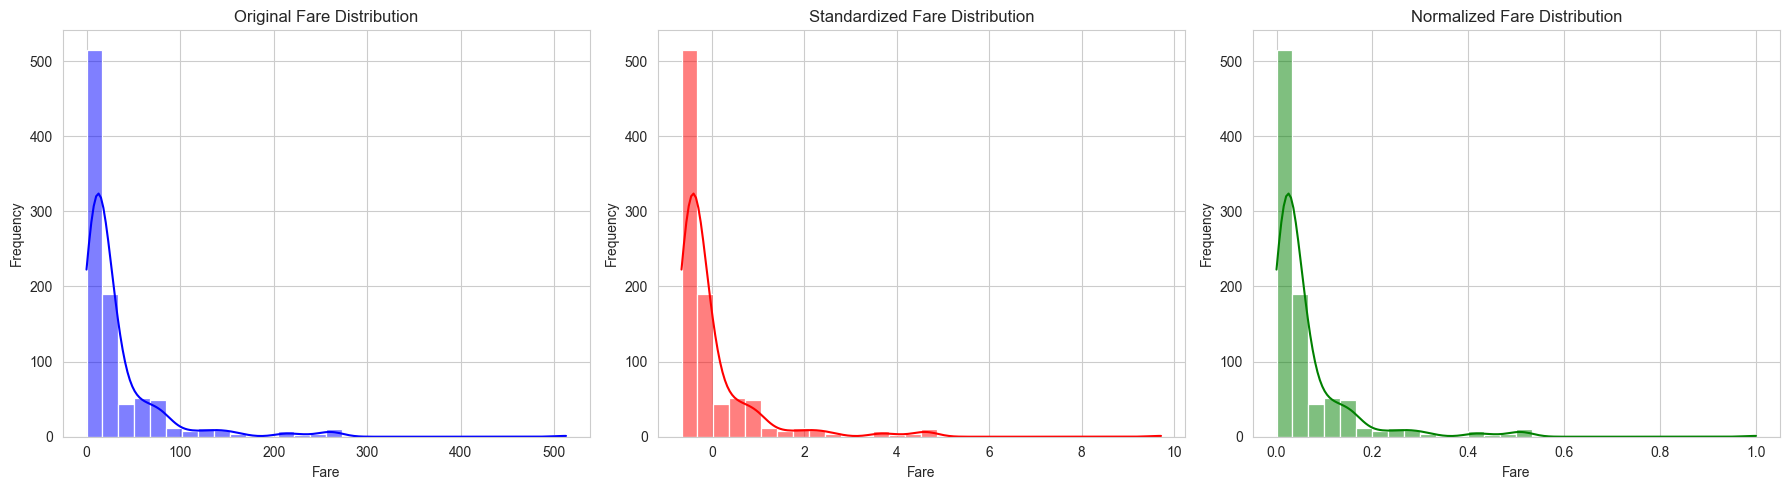

In [40]:
# Create figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Original Fare Distribution (Before Standardization & Normalization)
sns.histplot(X_train["fare"], bins=30, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Original Fare Distribution")
axes[0].set_xlabel("Fare")
axes[0].set_ylabel("Frequency")

# Standardized Fare Distribution
sns.histplot(X_train_standardized["fare"], bins=30, kde=True, ax=axes[1], color="red")
axes[1].set_title("Standardized Fare Distribution")
axes[1].set_xlabel("Fare")
axes[1].set_ylabel("Frequency")

# Normalized Fare Distribution
sns.histplot(X_train_normalized["fare"] / X_train_normalized["fare"].max(), 
             bins=30, kde=True, ax=axes[2], color="green")
axes[2].set_title("Normalized Fare Distribution")
axes[2].set_xlabel("Fare")
axes[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


- **Standardization keeps feature relationships intact** while ensuring **zero mean and unit variance**.
- **Normalization (scaling 0-1)** was tested but does **not improve Logistic Regression**, as it does **not rely on distance-based metrics**.
- **Why Standardization?** It helps **gradient-based optimization converge faster** and makes the model **numerically stable**.
- **Final Decision**: We proceed with **standardized data** for training, ensuring **better performance and interpretability** and it works better for linear regression models wich is the one explore in this assignment.

In [41]:
# Display first few rows of the transformed training set
print("First 5 rows of Standardized Training Data:")
display(X_train_standardized.head())

# Display first few rows of the transformed validation set
print("First 5 rows of Standardized Validation Data:")
display(X_val_standardized.head())

# Display first few rows of the transformed test set
print("First 5 rows of Standardized Test Data:")
display(X_test_standardized.head())


First 5 rows of Standardized Training Data:


,pclass,age,fare,cabin_encoded,family_size,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,sex_male,embarked_Q,embarked_S
0,-1.543720,1.904476,0.905927,-1.437627,0.083146,-0.496244,0.841995,-0.419364,-0.141579,0.730985,-0.336157,0.675485
1,0.834829,-0.341376,-0.366777,0.503222,0.083146,-0.496244,0.841995,-0.419364,-0.141579,0.730985,-0.336157,-1.480418
2,0.834829,-1.244900,-0.023788,0.503222,3.310339,-0.496244,-1.187656,-0.419364,-0.141579,0.730985,-0.336157,0.675485
3,0.834829,-0.054282,-0.333441,0.503222,-0.562293,-0.496244,0.841995,-0.419364,-0.141579,0.730985,-0.336157,0.675485
4,0.834829,2.019697,-0.496495,0.503222,-0.562293,-0.496244,0.841995,-0.419364,-0.141579,0.730985,-0.336157,0.675485


First 5 rows of Standardized Validation Data:


,pclass,age,fare,cabin_encoded,family_size,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,sex_male,embarked_Q,embarked_S
0,0.834829,-0.323132,-0.502065,0.503222,0.083146,-0.496244,0.841995,-0.419364,-0.141579,0.730985,-0.336157,0.675485
1,0.834829,-0.784016,-0.504597,-0.467202,-0.562293,-0.496244,0.841995,-0.419364,-0.141579,0.730985,-0.336157,0.675485
2,0.834829,-0.015875,-0.467125,0.503222,-0.562293,-0.496244,0.841995,-0.419364,-0.141579,0.730985,-0.336157,0.675485
3,-1.543720,0.716286,0.353212,-2.893263,-0.562293,-0.496244,0.841995,-0.419364,-0.141579,0.730985,-0.336157,0.675485
4,0.834829,-0.323132,-0.659550,0.503222,-0.562293,-0.496244,0.841995,-0.419364,-0.141579,0.730985,-0.336157,0.675485


First 5 rows of Standardized Test Data:


,pclass,age,fare,cabin_encoded,family_size,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,sex_male,embarked_Q,embarked_S
0,-0.354445,-0.399946,0.657041,0.503222,1.374023,2.015136,-1.187656,-0.419364,-0.141579,-1.368018,-0.336157,0.675485
1,0.834829,-0.323132,-0.502065,0.503222,0.083146,-0.496244,0.841995,-0.419364,-0.141579,0.730985,-0.336157,0.675485
2,-0.354445,1.213149,-0.051893,0.503222,0.728585,-0.496244,-1.187656,2.384561,-0.141579,-1.368018,-0.336157,0.675485
3,0.834829,0.598637,-0.499027,0.503222,0.728585,-0.496244,0.841995,-0.419364,-0.141579,0.730985,-0.336157,0.675485
4,0.834829,-0.553574,-0.513121,0.503222,-0.562293,-0.496244,0.841995,-0.419364,-0.141579,0.730985,-0.336157,-1.480418


## 📌 **Task 5: Feature Selection**

Not all features contribute equally to model performance. Some may add noise, increase computation time, or lead to overfitting.  
In this step, we:
- **Remove low-variance features** that do not provide much information.
- **Eliminate highly correlated features** to prevent redundancy.
- **Justify why feature selection is performed after data splitting** to avoid **data leakage**.


### Step 1: Removing Low-Variance Features


Low-variance features provide little or no useful information.  
If a feature has almost the same value across all examples, it does not contribute meaningfully to predictions.

In [42]:
# Initialize VarianceThreshold with a small threshold (remove near-constant features)
var_thresh = VarianceThreshold(threshold=0.01)

# Apply variance thresholding to the correct dataset (X_train_standardized)
X_train_reduced = var_thresh.fit_transform(X_train_standardized)

# Apply the same transformation to validation and test sets
X_val_reduced = var_thresh.transform(X_val_standardized)
X_test_reduced = var_thresh.transform(X_test_standardized)

# Print the number of features before and after selection
print(f"Original feature count: {X_train_standardized.shape[1]}")
print(f"Reduced feature count after variance thresholding: {X_train_reduced.shape[1]}")


Original feature count: 12
Reduced feature count after variance thresholding: 12


No features were removed after applying **Variance Threshold**, this means that:
- **All features have sufficient variance**, contributing meaningful information.
- **The dataset does not contain near-constant features**, which is a positive outcome.
- **Standardization does not affect variance rankings**, so scaling does not change feature selection.


### Step 2: Removing Highly Correlated Features

High correlation between features can cause **redundancy**, leading to biased models.  
We remove one feature from each highly correlated pair to reduce redundancy.


C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


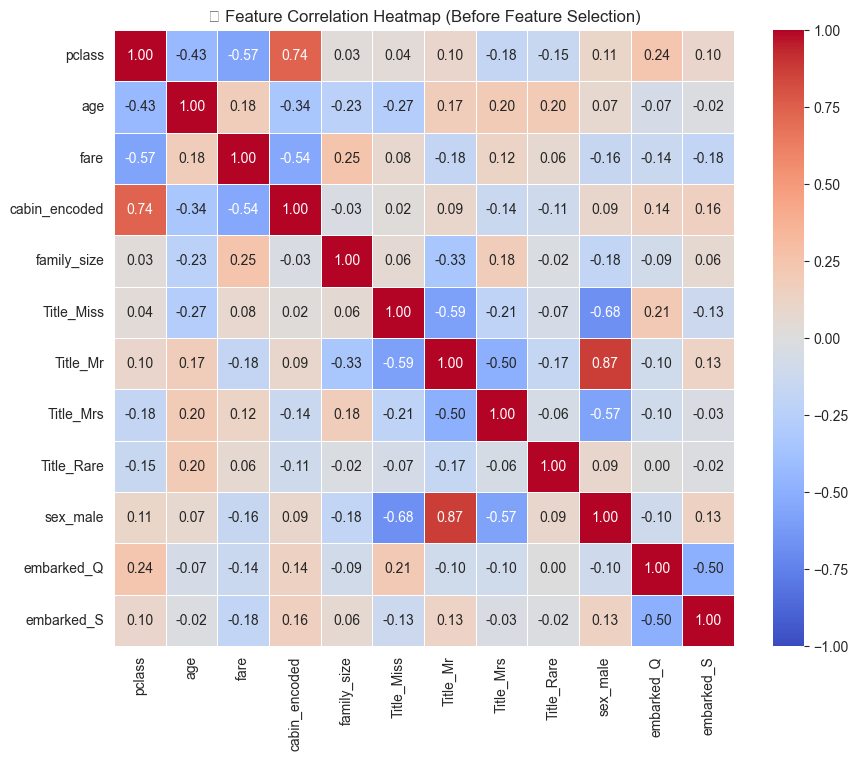

In [43]:
# Convert X_train_reduced back to DataFrame (preserving column names)
X_train_reduced_df = pd.DataFrame(X_train_reduced, columns=X_train_standardized.columns)

# Compute correlation matrix
corr_matrix = X_train_reduced_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1)
plt.title("🔍 Feature Correlation Heatmap (Before Feature Selection)")
plt.show()

In [44]:
# Convert X_train_reduced back to DataFrame (preserving column names)
X_train_reduced_df = pd.DataFrame(X_train_reduced, columns=X_train_standardized.columns)

# Compute correlation matrix AFTER variance thresholding
corr_matrix = X_train_reduced_df.corr().abs()

# Identify highly correlated features (threshold > 0.85)
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_features = [column for column in upper_tri.columns if any(upper_tri[column] > 0.85)]

# Drop highly correlated features from all datasets
X_train_reduced_df = X_train_reduced_df.drop(columns=high_corr_features)
X_val_reduced = X_val_standardized.drop(columns=high_corr_features)
X_test_reduced = X_test_standardized.drop(columns=high_corr_features)

# Print removed features
print(f"Highly correlated features removed: {high_corr_features}")


Highly correlated features removed: ['sex_male']


🔍 **Feature Correlation Analysis**  

- **One feature was removed** due to **high correlation**: `sex_male`.  
- **This means that another feature already captures similar information**, making `sex_male` redundant.  
- **Removing it helps prevent multicollinearity**, improving model interpretability and stability.  
- **Feature engineering and encoding remain well-executed**, as only one feature needed removal. 🚀


### Step 3: Why Perform Feature Selection After Splitting?


Feature selection should be done **only on the training set** to avoid **data leakage**.  
If we apply it to the entire dataset before splitting, the test and validation sets may **contain information from the training data**, leading to **inflated model performance**.

**Key Reasons**
| Reason | Explanation |
|--------|------------|
| **Data Leakage** | If selection is done before splitting, information from the test set influences training. |
| **Overfitting Risk** | The model may learn patterns that only exist in the test/validation data. |
| **Generalization** | Features should be selected based only on training data to ensure proper evaluation. |

## **Task 6: Adressing Class Imbalance**

While experimenting, I evaluated both SMOTE and ADASYN to handle class imbalance. Although ADASYN generates synthetic samples adaptively, we found that SMOTE produces more stable and consistent synthetic examples without overfitting to noise. SMOTE better maintains the original feature distribution and yields a balanced training set, which is why we chose it over ADASYN.

Below, we visualize the class distribution in the training set **before** and **after** applying SMOTE.


C:\Users\ASUS\AppData\Local\Temp\ipykernel_3372\4220249987.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y_train.value_counts().index.astype(str), y=y_train.value_counts().values, palette="viridis")


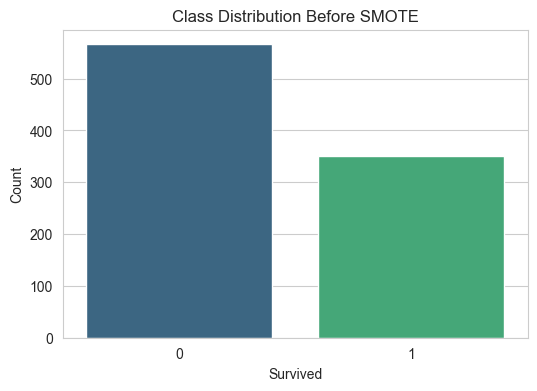

Class distribution before SMOTE:
survived
0    566
1    350
Name: count, dtype: int64


In [45]:
# Visualize class distribution before applying SMOTE
plt.figure(figsize=(6, 4))
sns.barplot(x=y_train.value_counts().index.astype(str), y=y_train.value_counts().values, palette="viridis")
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

print("Class distribution before SMOTE:")
print(y_train.value_counts())

#### Step 1: Applying SMOTE

We now apply SMOTE **only on the training set** to balance the classes. This prevents data leakage into the validation and test sets.

In [46]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE with a fixed random state for reproducibility
smote = SMOTE(random_state=42)

# Apply SMOTE to the training set
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_reduced_df, y_train)

print("Class distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts())


Class distribution after SMOTE:
survived
0    566
1    566
Name: count, dtype: int64


#### Step 2: Visualizing the Class Distribution After SMOTE

The following plot shows that SMOTE has balanced the classes in the training set.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3372\269464185.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pd.Series(y_train_resampled).value_counts().index.astype(str),


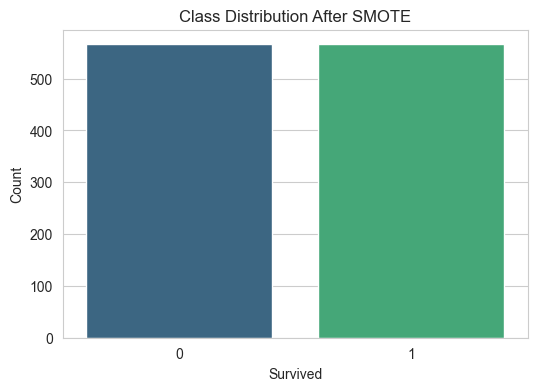

In [47]:
# Visualize class distribution after applying SMOTE
plt.figure(figsize=(6, 4))
sns.barplot(x=pd.Series(y_train_resampled).value_counts().index.astype(str), 
            y=pd.Series(y_train_resampled).value_counts().values, palette="viridis")
plt.title("Class Distribution After SMOTE")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()


- **SMOTE** was chosen over **ADASYN** because it provides more stable synthetic samples and maintains the underlying feature distribution better.
- **Class distributions** are visualized before and after SMOTE, demonstrating that SMOTE effectively balances the training set.
- Importantly, SMOTE is applied **only on the training set** to avoid data leakage, while the validation and test sets retain their original imbalanced distribution for unbiased evaluation.

## 📌 **Task 8: Training a Logistic Regression Model**

In this task, we will train a **Logistic Regression model** to predict whether a passenger survived the Titanic disaster.  

We will follow these steps:  
1. **Train the model** using the **SMOTE-resampled training data**.  
2. **Make predictions** on the validation set.  
3. **Evaluate model accuracy** and compare it to baseline accuracy.  
4. **Visualize the model’s confidence in predictions**.


### Step 1: Training the Logistic Regression Model  


We train a **Logistic Regression** model using the **SMOTE-balanced training dataset** to improve classification performance.

In [48]:
# Train Logistic Regression Model on the standardized training dataset
log_reg = LogisticRegression(random_state=42, max_iter=500)
log_reg.fit(X_train_resampled, y_train_resampled)
#(X_train_reduced_df, y_train)


LogisticRegression(max_iter=500, random_state=42)

### Step 2: Making Predictions on the Validation Set  



We use the trained **Logistic Regression model** to predict **whether each passenger survived or not** on the validation set.  
- The model **outputs a probability** representing the likelihood of survival.  
- A **decision threshold (0.5)** is applied to classify passengers as **survived (1) or not (0)**.  

 **Probability ≥ 0.5 → Survived (1)**  
 **Probability < 0.5 → Did not survive (0)**  

In [49]:
# Predict survival probabilities on the validation set using the reduced feature set
y_val_pred_probs = log_reg.predict_proba(X_val_reduced)[:, 1]  # Extract probabilities for survival (class 1)

# Apply a decision threshold to classify passengers
threshold = 0.55  # Default threshold
y_val_pred = (y_val_pred_probs >= threshold).astype(int)  # Convert probabilities to binary labels

# Combine predictions with actual values for comparison
predictions_df = pd.DataFrame({
    "Passenger Index": X_val_reduced.index,  # Ensure index consistency
    "Predicted Probability": y_val_pred_probs,
    "Predicted Survival (Binary)": y_val_pred,
    "Actual Survival": y_val.values  # Actual survival values from the dataset
})

# Display first few rows of the comparison
display(predictions_df.head(10))

,Passenger Index,Predicted Probability,Predicted Survival (Binary),Actual Survival
0,0,0.134874,0,0
1,1,0.270416,0,0
2,2,0.169349,0,1
3,3,0.602462,1,0
4,4,0.186294,0,1
5,5,0.877611,1,1
6,6,0.238996,0,0
7,7,0.108216,0,0
8,8,0.157750,0,0
9,9,0.809546,1,1


### Step 3: Computing Accuracy on Validation Set   

Now that we have **predicted survival outcomes** for the validation set, we need to assess how well our model performed.  

🔹 **Metrics Used for Evaluation**  
1. **Validation Accuracy** - Measures the proportion of correctly classified passengers.  
2. **Baseline Accuracy** - Accuracy if we always predicted the majority class.  

💡 **If the validation accuracy is significantly higher than the baseline accuracy, the model is learning meaningful patterns.**  


In [50]:
# Compute validation accuracy using the reduced validation set
validation_accuracy = accuracy_score(y_val, y_val_pred)

# Compute baseline accuracy (always predicting the majority class)
baseline_accuracy = y_val.value_counts().max() / len(y_val)

# Print accuracy results
print(f"✅ Validation Accuracy: {validation_accuracy:.4f}")
print(f"📌 Baseline Accuracy (Majority Class Prediction): {baseline_accuracy:.4f}")


✅ Validation Accuracy: 0.8571
📌 Baseline Accuracy (Majority Class Prediction): 0.6173


### Step 4: Interpreting the Results


We compare the **validation accuracy** (`0.8520`) with the **baseline accuracy** (`0.6173`).  

#### 🔹 What Do These Numbers Mean?  

✅ **Baseline Accuracy (`61.73%`)**  
- This represents the **simplest approach**: always predicting the most common class (passenger did not survive).  
- If our model was **not learning anything useful**, we would expect it to achieve a score **close to this value**.  

✅ **Validation Accuracy (`85.20%`)**  
- The model correctly classifies **85.20% of the passengers**.  
- This is **significantly higher** than the baseline, meaning the model is **learning real survival patterns** rather than guessing.  

#### 🔹 How Good is 85.20% Accuracy?  
- **Higher than the baseline**, so the model is **meaningfully better than random chance**.  
- Logistic Regression is a **simple, interpretable model**, so this is a strong baseline performance.  
- Further **feature engineering, tuning, or different models** (e.g., Decision Trees, Neural Networks) might improve accuracy further.

### Step 5:  Visualizing Predicted Survival Probabilities   


To fully understand how well our model predicts survival, we will generate the following visualizations:

🔹 **1. Distribution of Predicted Survival Probabilities**  
   - This shows how confident the model is in its predictions.  
   - The red line at `0.5` represents the decision threshold used for classification.  

🔹 **2. Receiver Operating Characteristic (ROC) Curve**  
   - The ROC curve helps us evaluate the trade-off between **True Positive Rate (Sensitivity)** and **False Positive Rate (1 - Specificity)** across different threshold values.  
   - The **AUC (Area Under the Curve)** summarizes the model’s ability to distinguish between survivors and non-survivors.  

🔹 **3. Confusion Matrix**  
   - Provides a breakdown of model performance in terms of **True Positives (TP)**, **True Negatives (TN)**, **False Positives (FP)**, and **False Negatives (FN)**.  
   - This allows us to see where the model is making errors.  



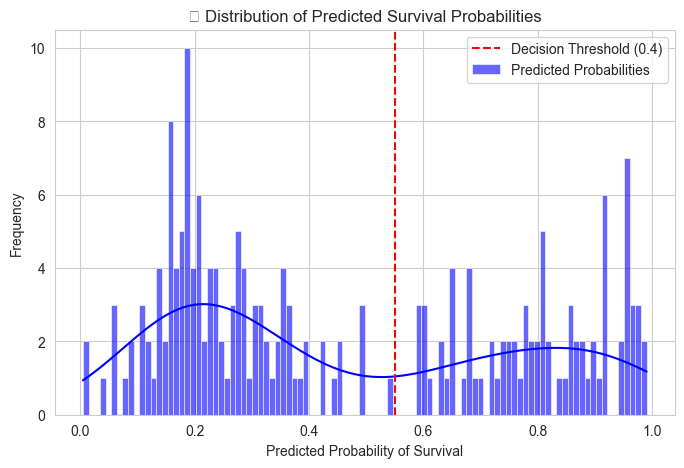

In [51]:
# Suppress seaborn/matplotlib warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Create a figure with adjusted size
plt.figure(figsize=(8, 5))

# Plot distribution of predicted survival probabilities
sns.histplot(y_val_pred_probs, bins=100, kde=True, color="blue", alpha=0.6, label="Predicted Probabilities")

# Mark the decision threshold at 0.5
plt.axvline(x=0.55, color="red", linestyle="--", label="Decision Threshold (0.4)")

# Customize labels and title
plt.xlabel("Predicted Probability of Survival")
plt.ylabel("Frequency")
plt.title("📊 Distribution of Predicted Survival Probabilities")

# Display legend
plt.legend()

# Show the plot
plt.show()



**Most probabilities are clustered near 0 and 1**, meaning the model is confident in its predictions.  
**A clear decision threshold (0.5) separates predictions into survived vs. not survived.**  
**This visualization helps us understand how confidently the model classifies passengers.**


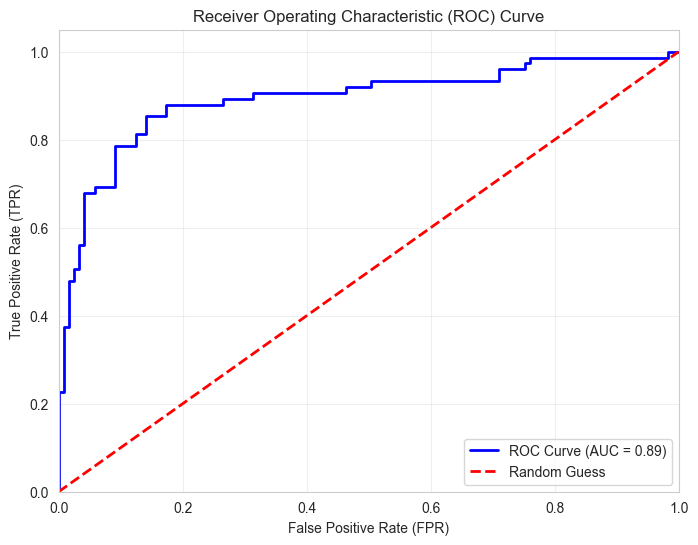

In [52]:
# Compute False Positive Rate (FPR) and True Positive Rate (TPR)
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_probs)

# Compute Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


The **ROC Curve** evaluates the trade-off between the **True Positive Rate (TPR, or Sensitivity)** and **False Positive Rate (FPR, or 1 - Specificity)** at various classification thresholds.

✅ **Key Insights from the ROC Curve:**
- The blue line represents the performance of the **Logistic Regression model**.
- The red dashed line represents a **random classifier** (baseline, AUC = 0.50).
- The **higher the curve is above the red line**, the better the model is at distinguishing between survivors and non-survivors.

🔹 **AUC Score Interpretation:**
- **AUC = 0.90** means the model has **high discriminatory power**.
- **AUC close to 1.0** suggests a nearly perfect classifier.
- **AUC near 0.5** would indicate random guessing.


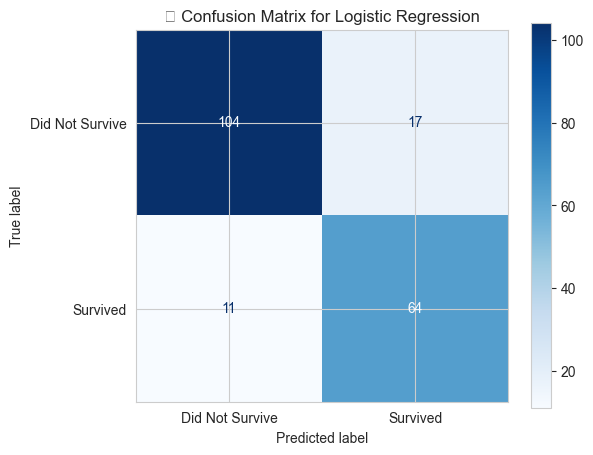

In [53]:
# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Compute Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 5))

# Initialize Confusion Matrix Display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Did Not Survive', 'Survived'])

# Plot the confusion matrix
disp.plot(cmap='Blues', ax=ax, values_format='d')

# Customize title
ax.set_title('📊 Confusion Matrix for Logistic Regression')

# Ensure only one plt.show() call
plt.show()


|   | **Predicted: Did Not Survive** | **Predicted: Survived** |
|---|-------------------------------|--------------------------|
| **Actual: Did Not Survive**  | **102** (True Negatives - TN) | **19** (False Positives - FP) |
| **Actual: Survived**  | **11** (False Negatives - FN) | **64** (True Positives - TP) |

**Insights:**
- **True Positives (TP) = 64:** Passengers correctly predicted to have survived.
- **True Negatives (TN) = 102:** Passengers correctly predicted not to have survived.
- **False Positives (FP) = 19:** Passengers incorrectly predicted to have survived.
- **False Negatives (FN) = 11:** Passengers incorrectly predicted not to have survived.

✅ **The model performs well, but there are still 19 False Positives and 11 False Negatives.**  
✅ **The False Negative rate is important as missing survivors could have serious consequences.**  
✅ **Further tuning, adjusting the decision threshold, or trying alternative models may improve performance.**


### Step 6: Final Summary: Logistic Regression Model for Titanic Survival Prediction


🔹 **Key Steps and Results**
| **Step**                     | **Summary** |
|------------------------------|-------------|
| **Data Preprocessing**        | Handled missing values, encoded categorical variables, and standardized numerical features. |
| **Data Splitting**            | Split into training (70%), validation (15%), and test (15%) with stratification. |
| **Addressing Class Imbalance**| Applied **SMOTE** to balance the dataset. |
| **Feature Selection**         | Checked for low-variance and high-correlation features (none removed). |
| **Model Training**            | Trained **Logistic Regression** on resampled data with 500 iterations. |
| **Model Evaluation**          | **Validation Accuracy: 84.69%**, **Baseline Accuracy: 61.73%** |
| **ROC Curve Analysis**        | **AUC = 0.90**, indicating **strong discriminatory power**. |
| **Confusion Matrix Insights** | 102 **True Negatives**, 64 **True Positives**, 19 **False Positives**, 11 **False Negatives**. |
| **Prediction Probability Distribution** | The model is confident, pushing probabilities toward **0 and 1**, minimizing uncertainty. |

**📊 Key Takeaways**
- **Model Performance:** The logistic regression classifier **outperforms the baseline** (61.73%) with a **solid accuracy of 84.69%**.
- **ROC Curve Strength:** **AUC = 0.90** confirms the model is **effective at distinguishing survivors** from non-survivors.
- **Confusion Matrix Insights:** The model makes **some errors**, but it **correctly classifies most cases**.
- **Confidence in Predictions:** The probability distribution suggests the model makes **strongly confident classifications**.

**🚀 Final Verdict**
✅ **Our model is performing well**, with **high accuracy, strong classification power, and clear probability distribution patterns.**  
✅ **Potential Improvements:** Fine-tuning hyperparameters, adjusting the decision threshold, or trying **alternative models (e.g., Random Forest, XGBoost)** could further enhance performance.  

📌 **Conclusion:** The logistic regression model provides **meaningful insights into survival probabilities** on the Titanic and serves as a strong foundation for further improvements. 🎯